# 🌐 Clase Introductoria a NumPy para Ingeniería

Utilizaremos un dataset real de sensores para aprender NumPy desde lo más básico hasta análisis vectorizado y estadístico.

Utilizaremos el dataset de Kaggle Sensor Data [Time Series]
https://www.kaggle.com/datasets/marcpaulo/sensor-data


In [41]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## 📥 Cargar Dataset de Sensores

In [42]:
path = kagglehub.dataset_download("marcpaulo/sensor-data")
print("Path to dataset files:", path)
print(os.listdir(path))
csv_path = os.path.join(path, "sensor_data.csv")

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/marcpaulo/sensor-data/versions/1
['sensor_data.csv']


In [43]:
# Cargar el dataset
df = pd.read_csv(csv_path) 

# Mostramos las primeras filas
print(df.head())

    time   SensorA   SensorB   SensorC
0  00:00  1.416250  4.219930  3.139646
1  00:01  3.534439       NaN  3.064088
2  00:02  5.659733       NaN  2.925565
3  00:03  5.640167  3.073650  5.381210
4  00:04  4.454474  1.554044  1.055965


## 📌 Fundamentos de NumPy y Ventajas sobre listas

In [44]:
# Comparación de listas vs arrays
import time

lista = list(range(1_000_000))
array = np.array(lista)

start = time.time()
lista_doble = [x * 2 for x in lista]
print("Tiempo con lista:", time.time() - start)

start = time.time()
array_doble = array * 2
print("Tiempo con array:", time.time() - start)

Tiempo con lista: 0.048193931579589844
Tiempo con array: 0.0007443428039550781


## ⚙️ Operaciones Vectorizadas con Datos de Sensores

In [45]:
print(df.columns)

Index(['time', 'SensorA', 'SensorB', 'SensorC'], dtype='object')


In [46]:
# Convertir timestamp a datetime
df['time'] = pd.to_timedelta(df['time']+ ':00')
df.set_index('time', inplace=True)
# Operaciones vectorizadas
valores = df.values
promedio = np.nanmean(valores, axis=0)
desviacion = np.nanstd(valores, axis=0)

print("Promedio por sensor:", promedio)
print("Desviación estándar por sensor:", desviacion)


Promedio por sensor: [9.79364054 3.21594494 8.01360374]
Desviación estándar por sensor: [2.03738032 2.84251535 2.13787374]


## 📊 Visualización de Lecturas de Sensores

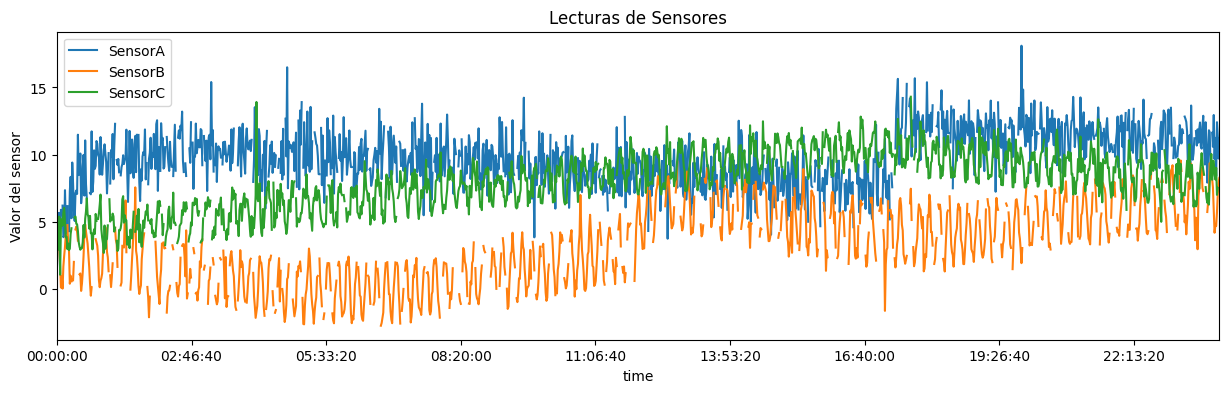

In [48]:
df.plot(figsize=(15, 4), title="Lecturas de Sensores")
plt.ylabel("Valor del sensor")
plt.show()

## 🚨 Detección de Anomalías

Conteo de anomalías por sensor: [5 0 1]


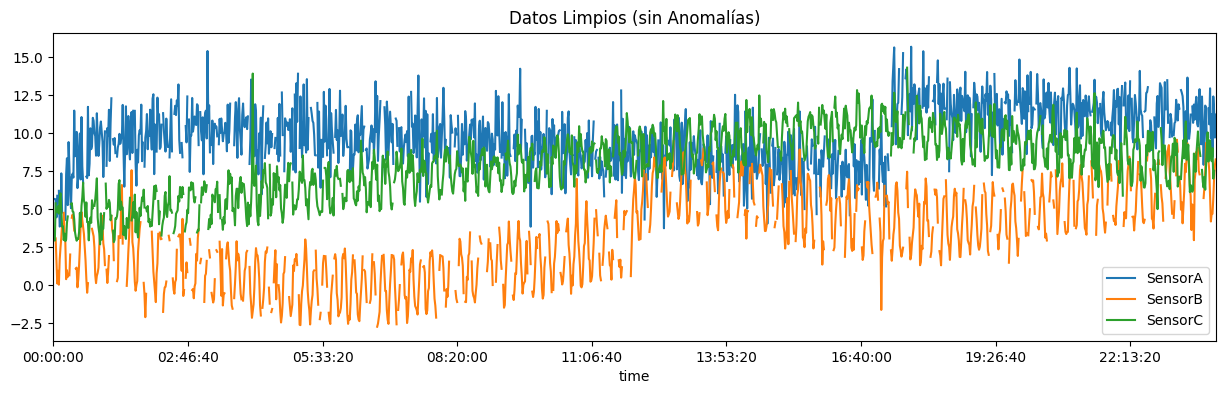

In [49]:
# Anomalías: valores que exceden 3 desviaciones estándar
anomalías = (np.abs(valores - promedio) > 3 * desviacion) & ~np.isnan(valores)
print("Conteo de anomalías por sensor:", anomalías.sum(axis=0))

# Reemplazar anomalías con NaN
df_cleaned = df.mask(anomalías)
df_cleaned.plot(figsize=(15, 4), title="Datos Limpios (sin Anomalías)")
plt.show()

## 📈 Estadísticas Básicas

In [50]:
print("Media:", np.mean(df_cleaned.values, axis=0))
print("Máximo:", np.max(df_cleaned.values, axis=0))
print("Mínimo:", np.min(df_cleaned.values, axis=0))
print("Desviación estándar:", np.std(df_cleaned.values, axis=0))

Media: [nan nan nan]
Máximo: [nan nan nan]
Mínimo: [nan nan nan]
Desviación estándar: [nan nan nan]
